# Week 3 Exercise: Insurance Cost Data



### Step 1: Data Preprocessing

#### Q1. What is the purpose of performing a linear regression model to the insurance data?


First let's import libraries, read the data and get an overview of the data. 

###### code for reference
import pandas as pd 

insurance = pd.read_csv()

insurance.head()

insurance.shape

insurance.describe()

insurance.dtypes

In [17]:
import pandas as pd

In [18]:
insurance = pd.read_csv("C:/Users/apere/OneDrive/Desktop/CIS 508/insurance.csv")
insurance.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [19]:
insurance.shape

(1338, 7)

In [20]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [21]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Step 2: Correlation

#### Q2. Which variable has the highest positive correlation with the target variable "charges"?

To answer this question, you can either create an correlation table, or create a heatmap to see the correlations between numerical variables.

##### code for reference
1. correlation table:

insurance.corr()

2. heatmap

import seaborn as sns

import matplotlib.pyplot as plt 

plt.figure(figsize=(14, 6))

sns.heatmap(corr, annot = True,cmap = sns.diverging_palette(20, 220, n=200))

plt.title('Correlation Heatmap')

In [22]:
corr = insurance.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

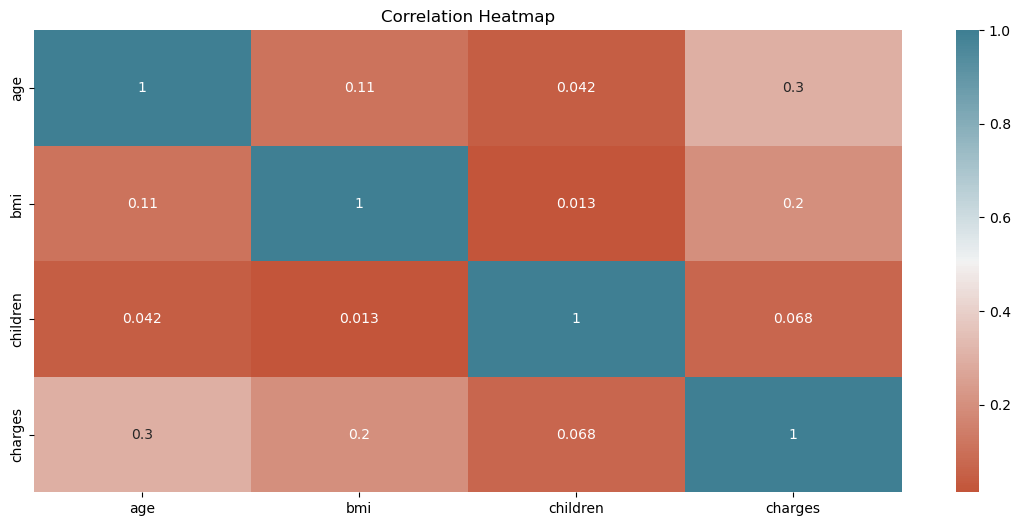

In [23]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

sns.heatmap(corr, annot = True,cmap = sns.diverging_palette(20, 220, n=200))

plt.title('Correlation Heatmap')

### Step 3. Train-test split
In this step, you need to perform label encoding and split the data into training and test.

#### Q3. If we want to perform label encoding for the predictors, which is the following syntax would you use?


#### Q4: Make a 80 (training) & 20 (test) split of the sample data. How many rows and columns are there in X_train set?


To answer these two questions, you need to divide the data into “attributes” and “labels”. X variable contains all the attributes/features and y variable contains labels.Then perform label encoding for predictors, and split the dataset into training set and test set.

1. First you need to perform labelencoding for predictors since there are several categorical variables.

#### code for reference
X = pd.get_dummies(insurance.iloc[ , ], drop_first = True)

y = insurance.iloc[ , ]          

or you can use:

X = pd.get_dummies(insurance[["predictor name here"]], drop_first = True)

y = insurance[['target variable name here']]


In [24]:
X = pd.get_dummies(insurance.iloc[ : , 0:6], drop_first = True)
y = insurance['charges']



In [25]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


2. Then, use train_test_split to divide data into X_train, X_test, y_train, y_test

#### code for reference

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape

(1070, 8)

### Step 4. Train a linear regression model on training set

#### Q5: Perform a multiple linear regression analysis using sklearn library. Which variable has the highest coefficient in predicting insurance charges?


To answer this question, you need to train a linear regression model on the training set and estimate the coefficients.

#### code for reference 
from sklearn.linear_model import LinearRegression

insurance_regressor = LinearRegression()  

insurance_regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(insurance_regressor.coef_,X.columns, columns=['Coeffient',]) 

coeff_df

In [27]:
from sklearn.linear_model import LinearRegression

insurance_regressor = LinearRegression()

insurance_regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(insurance_regressor.coef_,X.columns, columns=['Coeffient'])

coeff_df

,Coeffient
age,253.700500
bmi,335.962814
children,436.910121
sex_male,-15.463728
smoker_yes,23605.017267
region_northwest,-260.132732
region_southeast,-913.278834
region_southwest,-761.948706


#### Q6: Develop a regression model using statsmodels. Which of the following variables are not significant (with a margin of error 5%) in predicting the insurance charges?

#### Q7: What is the coefficient of determination in the model? (hint: watch lecture videos of this week)


To answer these two questions, you need to use statsmodel.api library to estimate the p values for each of predictors.

#### code for reference
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)

est = sm.OLS(y_train, X_train2)

est2 = est.fit()

print(est2.summary())


In [28]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)

est = sm.OLS(y_train, X_train2)

est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     371.7
Date:                Wed, 23 Nov 2022   Prob (F-statistic):          1.85e-301
Time:                        09:57:16   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1061   BIC:                         2.177e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.183e+04   1127.759  

### Step 6. Evaluate the model on test data

#### Q8: What is the Root Mean Squared Error for the test set?

#### Q9: Based on the value of Root Mean Squared Error, which data set performs better in predicting insurance charges? 
To answer theset two questions,

1. first you need to apply the linear regression model on both training set and test set.

#### code for reference
y_train_pred =insurance_regressor.predict(X_train)

y_test_pred = insurance_regressor.predict(X_test)

In [29]:
y_train_pred =insurance_regressor.predict(X_train)

y_test_pred = insurance_regressor.predict(X_test)

2. Then import metrics and numpy to estimate the Root Mean Squared Error.

#### code for reference

from sklearn import metrics

import numpy as np

print('Root Mean Squared Error on Test Data:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print('Root Mean Squared Error on Training Data:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

In [30]:
from sklearn import metrics

import numpy as np

print('Root Mean Squared Error on Test Data:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print('Root Mean Squared Error on Training Data:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Root Mean Squared Error on Test Data: 5641.62655885019
Root Mean Squared Error on Training Data: 6140.157418880165


#### Q10. Which set performs better of percent variance explained by the model?

To answer this question, you need to use **r2_score** to calculate r squared for test set.

#### code for reference
from sklearn.metrics import r2_score

r_sq_test = r2_score(y_test, y_test_pred)

print('R squared on test set:', r_sq_test)


In [32]:
from sklearn.metrics import r2_score

r_sq_test = r2_score(y_test, y_test_pred)

print('R squared on test set:', r_sq_test)

r_sq_train = r2_score(y_train, y_train_pred)

print('R squared on train set:', r_sq_train)

R squared on test set: 0.7999876970680433
R squared on train set: 0.7370262574551634
